<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/Bonus_Exercise/blob/main/11_OCR_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

## Install Libraries

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  P

In [ ]:
!apt-get install -y tesseract-ocr #Tesseract OCR -

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 50 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.2 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 839.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install keras-ocr matplotlib opencv-python numpy

In [ ]:
!pip install easyocr

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 #  OpenCV
import pytesseract#Extracting Text from Images
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Download and visualize sample image
Here we will be downloading the image for OCR.


1-Upload the Image to Google Drive:
Upload the image to your Google Drive.

2-Access the Image in Google Colab:
Mount Google Drive in Colab.
Use OpenCV to load the image and Matplotlib to display it.

In [ ]:
image_path="/content/drive/MyDrive/T5/Week 6/6- Introduction to computer vision/Practice Exercise/Datasets/OCR_example.png"
image= cv2.imread(image_path)

هذا السطر من الكود يُستخدم لعرض صورة باستخدام مكتبة matplotlib بعد تحويلها من تنسيق BGR (الذي تستخدمه مكتبة OpenCV) إلى تنسيق RGB (الذي تستخدمه مكتبة matplotlib). دعنا نحلل هذا السطر خطوة بخطوة:

{plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))}


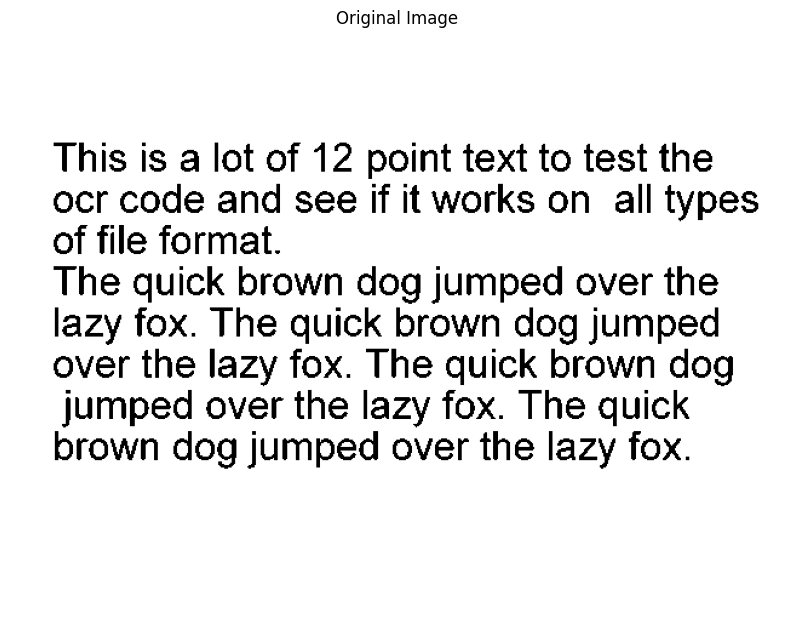

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))#converting
plt.title("Original Image")
plt.axis('off')
plt.show()

## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

In [ ]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

### Remove noise

In [ ]:
blurred_image=cv2.GaussianBlur(gray_image, (5, 5), 0)

### Sharpen the image

In [ ]:
laplacian_filter = cv2.Laplacian(blurred_image, cv2.CV_64F)
sharpened_image = cv2.subtract(blurred_image, cv2.convertScaleAbs(laplacian_filter))

### Binarize the image

In [ ]:
_, binarized_image = cv2.threshold(sharpened_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


## Display preprocessed images
Display the preprocessed images .

(-0.5, 639.5, 479.5, -0.5)

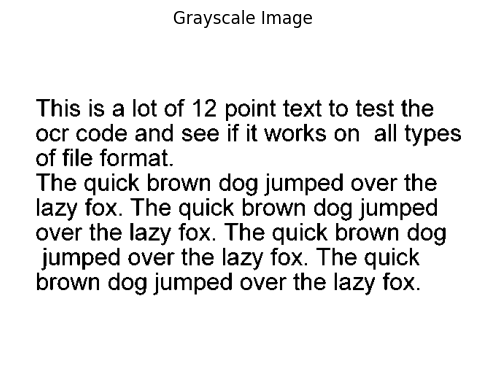

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

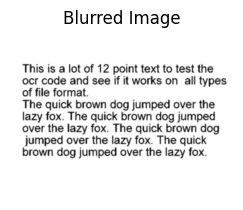

In [ ]:
plt.subplot(2, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

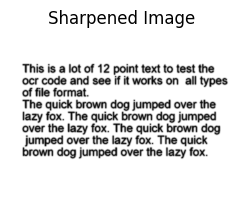

In [ ]:
plt.subplot(2, 2, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

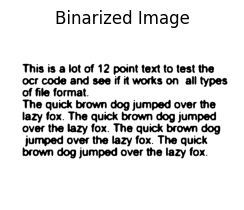

In [ ]:
plt.subplot(2, 2, 4)
plt.imshow(binarized_image, cmap='gray')
plt.title('Binarized Image')
plt.axis('off')

plt.show()

## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

In [ ]:
import cv2
import matplotlib.pyplot as plt

def display_image(image, title="Image", is_rgb=False):
    if is_rgb:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

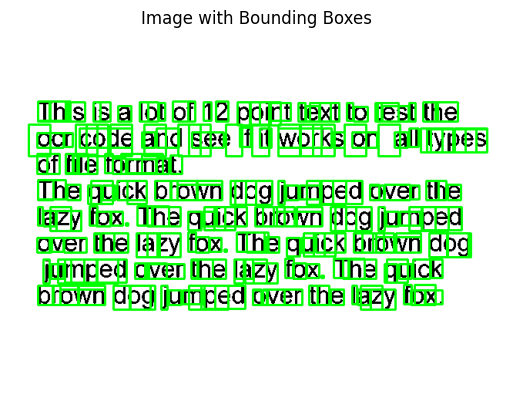

In [ ]:
boxes = pytesseract.image_to_boxes(binarized_image)
boxes_image = image.copy()

for box in boxes.splitlines():
    box = box.split(' ')
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    cv2.rectangle(boxes_image, (x, boxes_image.shape[0] - y), (w, boxes_image.shape[0] - h), (0, 255, 0), 2)

display_image(boxes_image, "Image with Bounding Boxes", is_rgb=True)

## Display the OCR predictions
The predictions made by the keras_ocr pipeline are stored in a variable. You should inspect the recognized text and do the following:
* You should print the detected texts in the image.
* You can also use `keras_ocr.tools.drawAnnotations()` to visualize the extracted text.

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

extracted_text = pytesseract.image_to_string(gray_image)
print(extracted_text)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

